# Multiple Linear Regression Step by Step

The following script outlines the application of the Multiple Linear Regression technique step by step and verifies if the obtained outputs correspond to the results from the [scikit-learn](https://scikit-learn.org/stable/) library.

# Step by step implementation

Step-by-Step Implementation:

- Check the dataset (cleaning, descriptive statistics, correlations).

- Adjust the model equation using the least squares method.

- Calculate the root mean squared error (or R¬≤) to determine if the dependent variable can be predicted by the parameters used.

- Use the F-statistic value to check if at least one of the independent variables is statistically significant.

- Check the statistical significance of each independent variable individually (and drop columns that are not significant).

- Test the normality of the residuals

- Compare the results.

### Checking the Dataset

In [1]:
# Libraries needed
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

In [2]:
# Check train Data
df_adver = pd.read_csv('Data/advertising.csv', index_col=0)
df_adver.head(5)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [3]:
# Checking null values
df_adver.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
# Checking parameters types
df_adver.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
# Descriptive statistics
df_adver.describe().T.round(2).drop('count',1)

mean    std  min    25%     50%     75%    max
TV         146.26  84.63  4.1  74.80  148.50  218.22  296.4
Radio       23.44  14.86  0.0  10.02   23.95   36.58   49.6
Newspaper   30.91  21.80  0.9  12.95   26.30   45.18  114.0
Sales       15.17   5.26  3.2  11.00   15.95   19.15   27.0

Apparently there's no outliers on the Dataset that could harm the model results. There's no null values either.

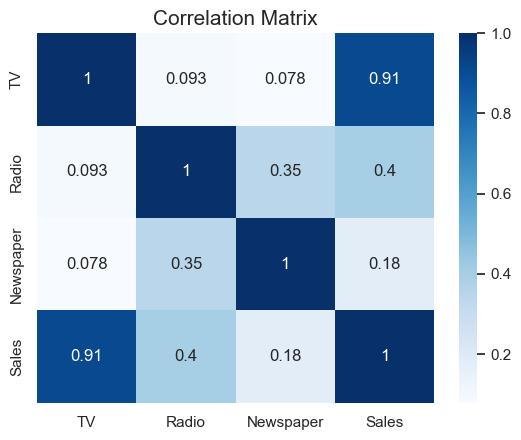

In [6]:
# Checking Correlations
sns.heatmap(df_adver.corr(), annot=True, cmap="Blues")
plt.title('Correlation Matrix', size=15);

All the other parameters have a positive correlation with 'Sales', specially 'TV'.

It's usefull creating scatter plots.

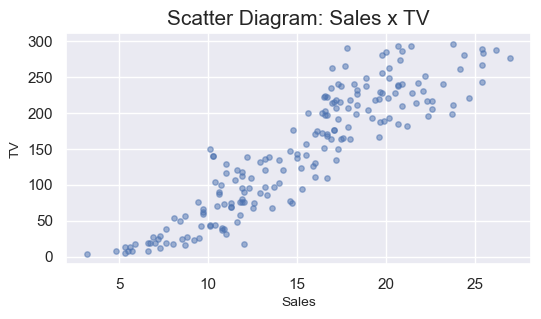

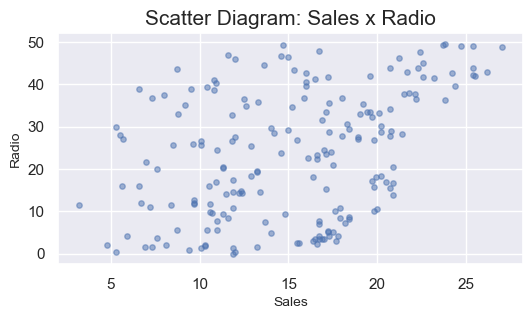

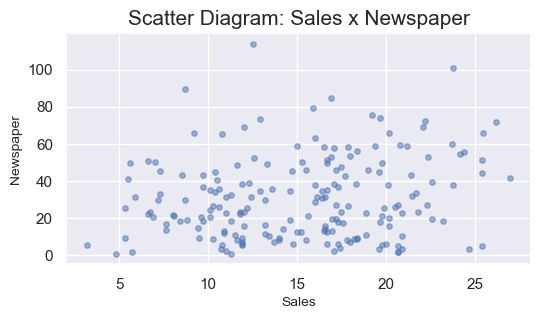

In [7]:
# Scatter Diagram Sales x TV
plt.figure(figsize=(6,3))
plt.scatter(df_adver['Sales'], df_adver['TV'], s=15, alpha=.5)
plt.xlabel('Sales', size=10)
plt.ylabel('TV', size=10)
plt.title('Scatter Diagram: Sales x TV', size=15);

# Scatter Diagram Sales x Radio
plt.figure(figsize=(6,3))
plt.scatter(df_adver['Sales'], df_adver['Radio'], s=15, alpha=.5)
plt.xlabel('Sales', size=10)
plt.ylabel('Radio', size=10)
plt.title('Scatter Diagram: Sales x Radio', size=15);

# Scatter Diagram Sales x Newspaper
plt.figure(figsize=(6,3))
plt.scatter(df_adver['Sales'], df_adver['Newspaper'], s=15, alpha=.5)
plt.xlabel('Sales', size=10)
plt.ylabel('Newspaper', size=10)
plt.title('Scatter Diagram: Sales x Newspaper', size=15);

It's noticed by the scatter plots that 'TV' has a bigger correlation with the sales than the other variables.

### Adjusting the model

The method of least squares involves minimizing the sum of the squared differences between the observed data points and the predicted values from a linear model. The covariation between two variables is a measure of how they vary together, and is closely related to the slope of the regression line in a linear model. Specifically, the slope of the regression line is equal to the covariance of the two variables divided by the variance of the independent variable.

In [8]:
# Covariance Matrix
df_cov = pd.DataFrame(index = df_adver.columns[:-1], columns = df_adver.columns)
for idx in df_cov.index:
    for col in df_cov.columns:
        df_cov[col].loc[idx] = np.cov(np.array(df_adver[idx]), np.array(df_adver[col]))[0][1]

In [9]:
# Separating A and b
A = df_cov.iloc[0:3,0:3].values.astype(float)
b = df_cov['Sales'].values.astype(float)

coef = np.linalg.solve(A,b)

intercept = df_adver.mean()[len(df_adver.mean())-1]
for i in range(0, len(df_adver.mean())-1):
    intercept -= df_adver.mean()[i] * coef[i]
    
print(f'The equation is: yi = {round(intercept,4)} + ({round(coef[0],4)} * x1) + ({round(coef[1],4)} * x2) + ({round(coef[2],7)} * x3)')

The equation is: yi = 4.5204 + (0.0548 * x1) + (0.1121 * x2) + (-6.45e-05 * x3)


### R-squared

Tthe fitted value of the dependent variable is equal to the intercept plus the sum of the products of the coefficients and independent variables.

In [10]:
# Obtaining the fitted values
df_adver['fitted_Sales'] = intercept
for i in range (0, len(df_adver.columns)-2):
    df_adver['fitted_Sales'] += df_adver.iloc[:,i]*coef[i]
df_adver.head(5)

TV  Radio  Newspaper  Sales  fitted_Sales
0  230.1   37.8       69.2   22.1     21.371518
1   44.5   39.3       45.1   10.4     11.363536
2   17.2   45.9       69.3   12.0     10.604833
3  151.5   41.3       58.5   16.5     17.454413
4  180.8   10.8       58.4   17.9     15.641904

In [11]:
# Getting R¬≤
residuals = df_adver['fitted_Sales'] - df_adver['Sales']
soma_quad_fitted_med = ((df_adver['fitted_Sales']-df_adver['Sales'].mean())**2).sum()
soma_quad_fitted_real = (residuals**2).sum()
R = soma_quad_fitted_med / (soma_quad_fitted_med + soma_quad_fitted_real)
print(f'R¬≤: {round(R,4)}')

R¬≤: 0.931


An R¬≤ value of 0.93 means that 93% of the variability in the dependent variable (the variable being predicted) is explained by the independent variables included in the model.

Even with a high R¬≤ value, some other statistical tests should be performed to confirm that the model is well-fitted.

## F and T-Test

The F-test checks whether at least one of the coefficients is statistically significant for the model (at a 95% confidence level).

In [12]:
# F-Test
dof1 = len(df_adver.columns) - 2
dof2 = len(df_adver) - dof1 -1
f_stat = ((soma_quad_fitted_med/dof1)/(soma_quad_fitted_real/dof2))
    
# P-value for F-Test
pvalf = 1-stats.f.cdf(f_stat, dof1, dof2)
print(f'F-statistic: {round(f_stat, 4)}, p-value: {round(pvalf, 4)}.')
    
# Checking significance
if pvalf < 0.05:
    print('At least one ùõΩ is significant.')
else:
    print('There are no significant ùõΩ.')

F-statistic: 836.6136, p-value: 0.0.
At least one ùõΩ is significant.


Assuming significant variables in the model based on the p-value of the F-test, the t-test is applied to each of the coefficients (including the intercept) to see if any variable is not significant and can be removed from the model.


In [13]:
# Creating a Matrix that contains de dependent values and a column of 1
X_ = np.concatenate((np.array([1 for x in range(0, len(df_adver))]).reshape(-1,1), df_adver[['TV', 'Radio', 'Newspaper']].values), axis=1)

In [14]:
# Sigma squared hat (3 cause the model has 3 predictory variables)
sigma_squared_hat = soma_quad_fitted_real / (len(df_adver) - df_adver.shape[1])
var_beta_hat = np.linalg.inv(X_.T @ X_) * sigma_squared_hat

In [15]:
# Testing the intercept significance
estat_t_alpha = intercept/(var_beta_hat[0, 0] ** 0.5 )  
pvalt = (1-stats.t.cdf(estat_t_alpha, dof2))*2
print(f'T statistic (Œ±): {round(estat_t_alpha,4)}, p-value: {round(pvalt, 4)}.')
if pvalt < 0.05:
    print(f'The intercept is statisticly different than 0.\n')
else:
    print(f'The intercept is statisticly equal 0.\n') 

# Testing the predictory variables significance
for i in range(0,3):
    estat_t_beta = coef[i]/(var_beta_hat[i+1, i+1] ** 0.5 )  
    pvalt = (1-stats.t.cdf(estat_t_beta, dof2))*2
        
    print(f'T statistic (ùõΩ{i}): {round(estat_t_beta,4)}, p-value: {round(pvalt, 4)}.')
    if pvalt < 0.05:
        print(f'Coeficient ùõΩ{i} ({df_adver.columns[i]}) is statisticly different than 0.\n')
    else:
        print(f'Coeficient ùõΩ{i} ({df_adver.columns[i]}) is statisticly equal 0.\n')

T statistic (Œ±): 17.1559, p-value: 0.0.
The intercept is statisticly different than 0.

T statistic (ùõΩ0): 45.4339, p-value: 0.0.
Coeficient ùõΩ0 (TV) is statisticly different than 0.

T statistic (ùõΩ1): 15.3474, p-value: 0.0.
Coeficient ùõΩ1 (Radio) is statisticly different than 0.

T statistic (ùõΩ2): -0.013, p-value: 1.0103.
Coeficient ùõΩ2 (Newspaper) is statisticly equal 0.



As can be observed, the p-value of the t-test corresponding to the 'Newspaper' variable is -0.013, therefore, this variable is not significant for the model construction and can be disregarded.

All of the processes needs to be repeated, excluding the variable.


### Repeating the Proccess with only significant variables

In [16]:
# Check train Data
df_adver = pd.read_csv('Data/advertising.csv', index_col=0)
df_adver = df_adver.drop('Newspaper', 1)
df_adver.head(5)

TV  Radio  Sales
0  230.1   37.8   22.1
1   44.5   39.3   10.4
2   17.2   45.9   12.0
3  151.5   41.3   16.5
4  180.8   10.8   17.9

In [17]:
# Covariance Matrix
df_cov = pd.DataFrame(index = df_adver.columns[:-1], columns = df_adver.columns)
for idx in df_cov.index:
    for col in df_cov.columns:
        df_cov[col].loc[idx] = np.cov(np.array(df_adver[idx]), np.array(df_adver[col]))[0][1]

In [18]:
# Separating A and b
A = df_cov.iloc[0:2,0:2].values.astype(float)
b = df_cov['Sales'].values.astype(float)

coef = np.linalg.solve(A,b)

intercept = df_adver.mean()[len(df_adver.mean())-1]
for i in range(0, len(df_adver.mean())-1):
    intercept -= df_adver.mean()[i] * coef[i]
    
print(f'The equation is: yi = {round(intercept,4)} + ({round(coef[0],4)} * x1) + ({round(coef[1],4)} * x2)')

The equation is: yi = 4.5193 + (0.0548 * x1) + (0.1121 * x2)


In [19]:
# Obtaining the fitted values
df_adver['fitted_Sales'] = intercept
for i in range (0, len(df_adver.columns)-2):
    df_adver['fitted_Sales'] += df_adver.iloc[:,i]*coef[i]
df_adver.head(5)

TV  Radio  Sales  fitted_Sales
0  230.1   37.8   22.1     21.373458
1   44.5   39.3   10.4     11.364016
2   17.2   45.9   12.0     10.606680
3  151.5   41.3   16.5     17.455609
4  180.8   10.8   17.9     15.644059

In [20]:
# Getting R¬≤
residuals = df_adver['fitted_Sales'] - df_adver['Sales']
soma_quad_fitted_med = ((df_adver['fitted_Sales']-df_adver['Sales'].mean())**2).sum()
soma_quad_fitted_real = (residuals**2).sum()
R = soma_quad_fitted_med / (soma_quad_fitted_med + soma_quad_fitted_real)
print(f'R¬≤: {round(R,4)}')

R¬≤: 0.931


It is interesting to note that despite the removal of the variable, the R¬≤ value of the model did not change. However, regardless of this value, the model will be better adjusted without the presence of this variable.

In [21]:
# F-Test
dof1 = len(df_adver.columns)-2
dof2 = len(df_adver) - dof1 -1
f_stat = ((soma_quad_fitted_med/dof1)/(soma_quad_fitted_real/dof2))
    
# P-value for F-Test
pvalf = 1-stats.f.cdf(f_stat, dof1, dof2)
print(f'F-statistic: {round(f_stat, 4)}, p-value: {round(pvalf, 4)}.')
    
# Checking significance
if pvalf < 0.05:
    print('At least one ùõΩ is significant.')
else:
    print('There are no significant ùõΩ.')

F-statistic: 1261.6661, p-value: 0.0.
At least one ùõΩ is significant.


In [22]:
# Sigma squared hat (3 cause the model has 3 predictory variables)
sigma_squared_hat = soma_quad_fitted_real / (len(df_adver) - df_adver.shape[1])
var_beta_hat = np.linalg.inv(X_.T @ X_) * sigma_squared_hat

In [23]:
# Testing the intercept significance
estat_t_alpha = intercept/(var_beta_hat[0, 0] ** 0.5 )  
pvalt = (1-stats.t.cdf(estat_t_alpha, dof2))*2
print(f'T statistic (Œ±): {round(estat_t_alpha,4)}, p-value: {round(pvalt, 4)}.')
if pvalt < 0.05:
    print(f'The intercept is statisticly different than 0.\n')
else:
    print(f'The intercept is statisticly equal 0.\n') 

# Testing the predictory variables significance
for i in range(0,2):
    estat_t_beta = coef[i]/(var_beta_hat[i+1, i+1] ** 0.5 )  
    pvalt = (1-stats.t.cdf(estat_t_beta, dof2))*2
        
    print(f'T statistic (ùõΩ{i}): {round(estat_t_beta,4)}, p-value: {round(pvalt, 4)}.')
    if pvalt < 0.05:
        print(f'Coeficient ùõΩ{i} ({df_adver.columns[i]}) is statisticly different than 0.\n')
    else:
        print(f'Coeficient ùõΩ{i} ({df_adver.columns[i]}) is statisticly equal 0.\n')

T statistic (Œ±): 17.1979, p-value: 0.0.
The intercept is statisticly different than 0.

T statistic (ùõΩ0): 45.5559, p-value: 0.0.
Coeficient ùõΩ0 (TV) is statisticly different than 0.

T statistic (ùõΩ1): 15.3843, p-value: 0.0.
Coeficient ùõΩ1 (Radio) is statisticly different than 0.



### Checking the Residuals Normality

If the residuals are not normally distributed, this can indicate the presence of some form of bias or nonlinearity in the model. This can lead to inaccurate predictions and reduced model performance. Therefore, it is important to check the normality of the residuals as part of the model diagnostic process.

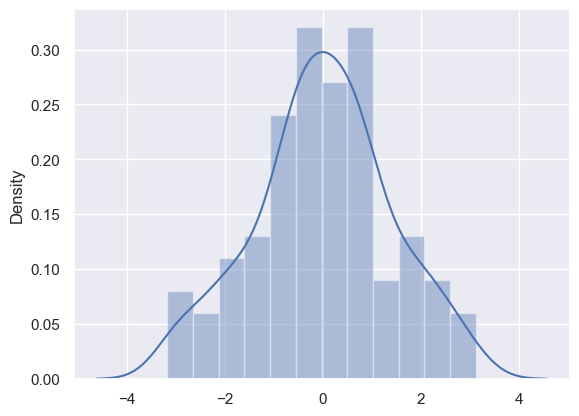

In [24]:
# Plotting a Histogram
sns.distplot(residuals);

A histogram can be a useful tool to observe the normality of the residuals, but to be more certain, the Shapiro-Wilk test is often used. This statistical test measures the discrepancy between the observed distribution of data and the expected distribution under normality, and provides a p-value to assess the normality of the data.

If the Shapiro test returns a p-value greater than 0.05, this indicates that there is not enough evidence to reject the null hypothesis of normality. In other words, we can conclude that the data follows a normal distribution at a significance level of 5% (or lower, depending on the exact p-value obtained).

In [25]:
# Shapiro Test
stats.shapiro(residuals)

ShapiroResult(statistic=0.9884517192840576, pvalue=0.12589530646800995)

The Linear Regression Model described by the variables 'Radio' and 'TV' is completed. It explains the behavior of the 'Sales' variable by 93% and its equation is:

${Sales}_i = {4.5193} + {TV}_{i} * {0.0548} + {Radio}_{i} * {0.1121}$

The significance of its variables could be observed, as well as the normality of the obtained residuals.

In [26]:
df_adver.head(5)

TV  Radio  Sales  fitted_Sales
0  230.1   37.8   22.1     21.373458
1   44.5   39.3   10.4     11.364016
2   17.2   45.9   12.0     10.606680
3  151.5   41.3   16.5     17.455609
4  180.8   10.8   17.9     15.644059

### Comparing the results

Now the results gotten on the step-by-step implementation will be compared to the results from sklearn library.

Firstly, we will compare the results of the model without the exclusion of the 'Newspaper' variable, which had an intercept of 4.5204 and coefficients (0.0548, 0.1121, and --6.45e-05) with an R¬≤ of 93%.

In [27]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [28]:
# Check Data
df_adver_comp1 = pd.read_csv('Data/advertising.csv', index_col=0)

In [29]:
# Applying the Dataframe on the model
x_v = df_adver_comp1.drop('Sales', 1).values
y_v = df_adver_comp1['Sales'].values
regressor = LinearRegression()
regressor.fit(x_v, y_v)

LinearRegression()

In [30]:
# Model Intercept
regressor.intercept_

4.5204461140456065

In [31]:
# Model Coefficients
regressor.coef_

array([ 5.48367159e-02,  1.12105939e-01, -6.44664274e-05])

In [32]:
# R¬≤
regressor.score(x_v, y_v)

0.9310048312189712

The results match perfectly. Now we will compare the results of a new model, conducted without the 'Newspaper' variable, which obtained an intercept of 4.5193 and coefficients of 0.1121 and 0.1121 for 'TV' and 'Radio', respectively, with an R-squared of 93%.

In [33]:
# Dropping Newspaper
df_adver_comp1 = df_adver_comp1.drop('Newspaper', 1)

In [34]:
# Applying the Dataframe on the model
x_v = df_adver_comp1.drop('Sales', 1).values
y_v = df_adver_comp1['Sales'].values
regressor = LinearRegression()
regressor.fit(x_v, y_v)

LinearRegression()

In [35]:
# Model Intercept
regressor.intercept_

4.519324338077698

In [36]:
# Model Coefficients
regressor.coef_

array([0.05483595, 0.11207358])

In [37]:
# R¬≤
regressor.score(x_v, y_v)

0.9310047685272043

The results obtained from the sklearn library are again identical to those reproduced in the step-by-step process for building the model.